In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_conc = pd.read_csv('use_conc/time_dependent_relerror.csv', index_col=0)
df_deriv = pd.read_csv('use_deriv/time_dependent_relerror.csv', index_col=0)

In [8]:
df_conc

,MiceID,Vendor,Day,RandomizedGroup,SCFA_value_observed,SCFA_deriv_observed,SCFA_deriv_predicted,SCFA_mol,Perturbation,Feedback,SCFA_deriv_abserror,SCFA_deriv_relerror
0,SI3,Shanghai,0,A,5.055757,5.055757,18.518185,Acetate,intrapolation,False,13.462429,266.279213
1,SI3,Shanghai,2,A,19.149833,19.149833,16.626618,Acetate,intrapolation,False,-2.523215,-13.176172
2,SI3,Shanghai,5,A,17.736701,17.736701,21.223508,Acetate,intrapolation,False,3.486807,19.658711
3,SI3,Shanghai,10,A,10.600160,10.600160,19.038405,Acetate,intrapolation,False,8.438245,79.604881
4,SI3,Shanghai,13,A,8.158938,8.158938,16.029440,Acetate,intrapolation,False,7.870502,96.464793
...,...,...,...,...,...,...,...,...,...,...,...,...
1741,SI2,Shanghai,10,B,3.481711,3.481711,3.482355,Propionate,extrapolation,True,0.000644,0.018504
1742,SI2,Shanghai,13,B,2.034246,2.034246,1.955441,Propionate,extrapolation,True,-0.078805,-3.873911
1743,SI2,Shanghai,19,B,4.211714,4.211714,4.424376,Propionate,extrapolation,True,0.212662,5.049296
1744,SI2,Shanghai,25,B,5.781750,5.781750,5.583168,Propionate,extrapolation,True,-0.198581,-3.434626


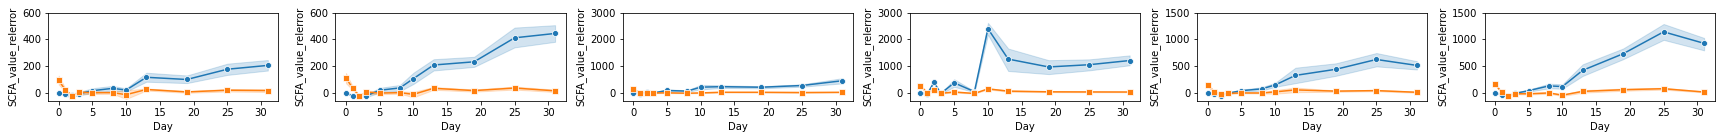

In [38]:
fig, ax = plt.subplots(figsize=(24,2), nrows=1, ncols=6, sharex=True)
feedback=False

for k1, scfa_ in enumerate(['Acetate','Propionate','Butyrate']):
    for k2, perturbation in enumerate(['intrapolation','extrapolation']):
        idx = k1*2+k2
        curr_df_deriv = df_deriv[(df_deriv.Perturbation==perturbation)&(df_deriv.Feedback==feedback)&(df_deriv.SCFA_mol==scfa_)]
        curr_df_conc = df_conc[(df_conc.Perturbation==perturbation)&(df_conc.Feedback==feedback)&(df_conc.SCFA_mol==scfa_)]
        _ = sns.lineplot(x='Day', y='SCFA_value_relerror', ci=68, marker='o', data=curr_df_deriv, ax=ax[idx])
        _ = sns.lineplot(x='Day', y='SCFA_deriv_relerror', ci=68, marker='s', data=curr_df_conc, ax=ax[idx])
        
        if k1==0:
            _ = ax[idx].set_ylim([-60,600])
        if k1==1:
            _ = ax[idx].set_ylim([-300,3000])
        if k1==2:
            _ = ax[idx].set_ylim([-150,1500])

plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("comp_relerror_deriv_vs_conc.svg", format="svg")
plt.tight_layout()